# Exercise 8: Sound transformations

In this exercise you will use the HPS model to creatively transform sounds. There are two parts in this exercise. In the first one you should perform a natural sounding transformation on the speech sound that you used in the previous exercise (E7). In the second part you should select a sound of your choice and do a "creative" transformation. You will have to write a short description of the sound and of the transformation you did, giving the link to the original sound and uploading several transformed sounds.

For this exercise, you can use the `transformations_GUI.py` (in `software/transformations_interface/`) to try things, once decided you can fill up the code in this file. You can also do everything from here and add any new code you wish.

In order to perform a good/interesting transformation you should make sure that you have performed an analysis that is adequate for the type of transformation you want to do. Not every HPS analysis representation will work for every type of sound transformation. There will be things in the analysis that when modified will result in undesired artifacts. In general, for any transformation, it is best to have the harmonic values as smooth and continuous as possible and an stochastic representation as smooth and with as few values as possible. It might be much better to start with an analysis representation that does not result in the best reconstruction in exchange of having smoother and more compact data.

To help you with the exercise, we give a brief description of the transformation parameters used by the HPS transformation function:

1. `freqScaling`: frequency scaling factors to be applied to the harmonics of the sound, in time-value pairs (where value of 1 is no scaling). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The scaling factor is a multiplicative factor, thus a value of 1 is no change. Example: to transpose an octave the sound you can specify `[0, 2, 1, 2]`.
2. `freqStretching`: frequency stretching factors to be applied to the harmonics of the sound, in time-value pairs (value of 1 is no stretching). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The stretching factor is a multiplicative factor whose effect depend on the harmonic number, higher harmonics being more affected that lower ones, thus resulting in an inharmonic effect. A value of 1 results in no transformation. Example: an array like `[0, 1.2, 1, 1.2]` will result in a perceptually large inharmonic effect.
3. `timbrePreservation`: 1 preserves the original timbre, 0 does not. It can only have a value of 0 or of 1. By setting the value to 1 the spectral shape of the original sound is preserved even when the frequencies of the sound are modified. In the case of speech it would correspond to the idea of preserving the identity of the speaker after the transformation.
4. `timeScaling`: time scaling factors to be applied to the whole sound, in time-value pairs (value of 1 is no scaling). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The time scaling factor is a multiplicative factor, thus 1 is no change. Example: to stretch the original sound to twice the original duration, we can specify `[0, 0, 1, 2]`.

All the transformation values can have as many points as desired, but they have to be in the form of an array with time-value pairs, so of even size. For example a good array for a frequency stretching of a sound that has a duration of 3.146 seconds could be: `[0, 1.2, 2.01, 1.2, 2.679, 0.7, 3.146, 0.7]`.

## Part 1. Perform natural sounding transformations of a speech sound

Use the HPS model with the sound `speech-female.wav`, available in the sounds directory, to first analyze and then obtain a natural sounding transformation of the sound. The synthesized sound should sound as different as possible to the original sound while sounding natural. By natural we mean that it should sound like speech, that it could have been possible to be produced by a human, and by listening we should consider it as a speech sound, even though we might not be able to understand it. You should first make sure that you start from a good analysis, then you can do time and/or frequency scaling transformations. The transformation should be done with a single pass, no mixing of sounds coming from different transformations. Since you used the same sound in A7, use that experience to get a good analysis, but consider that the analysis, given that we now want to use it for applying a very strong transformation, might be done differently than what you did in A7.

Write a short paragraph for every transformation, explaining what you wanted to obtain and explaining the transformations you did, giving both the analysis and transformation parameter values (sufficiently detailed for the evaluator to be able to reproduce the analysis and transformation).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
import sys, os
sys.path.append('../software/models/')
sys.path.append('../software/transformations/')
import utilFunctions as UF
import stft as STFT
import hpsModel as HPS
import hpsTransformations as HPST
import harmonicTransformations as HT
import IPython.display as ipd

In [3]:
# 1.1 perform an analysis/synthesis using the HPS model

input_file = '../sounds/speech-female.wav'

### set the parameters
window ='blackman'
M = 1471
N = 2048
t = -90
minSineDur = 0.005
nH = 150
minf0 = 100
maxf0 = 300
f0et = 3
harmDevSlope = 0.001
stocf = 0.2

# no need to modify anything after this
Ns = 512
H = 128

(fs, x) = UF.wavread(input_file)
w = get_window(window, M, fftbins=True)
hfreq, hmag, hphase, stocEnv = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)
y, yh, yst = HPS.hpsModelSynth(hfreq, hmag, hphase, stocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=x, rate=fs))
ipd.display(ipd.Audio(data=y, rate=fs))

### explain your parameter choices
"""
Window Size:
We select a window size of 1471 because the frequency of the voice is somewhere around 180 using our computation of the ideal window size with the blackman
window we can compute it as 6 * 44100 / 180 = 1471. 

FFT Size:
Then we select an FFT size of 2048, which is the next power of 2 greater than our window size. 

dB Threshold:
For the decibel threshold since we are using a blackman window we select a threshold of -90 db to elimintate the effects of the side lobes.

Minimum sine duration:
We select a minimum sine duration of 0.005 seconds because of the nature of the sample where the girl starts and stops speaking at short intervals.

Minimum f0:

We select a minimum f0 of 100 Hz as we can see in the graph above the lowest frequency is around 100 Hz.

Maximum f0:

We select a maximum f0 of 300 Hz as we can see in the graph above the highest frequency is around 300 Hz.

Number of harmonics:

As seen in the graph above counting the number of harmonics in the 2000 Hz range there are about 12 - 15 harmonics and since this is only about 10% of our perceptable
range we can multiply it by 10 to estimate the number of harmonics in the 20,000 Hz range so we get 150 harmonics.

F0 error threshold:

We select a relatively small f0 error threshold of 3, since we don't want it to be too big where it will include candidates that are not actual fundamental frequencies,
but we don't want it to be too small where it will miss candidates. We select a threshold of 3 since there aren't many inharmonic sounds in the voice but it may also be
hard to detect because there is a lot of variation in the harmonics.

Harmonic deviation slope:

We select a small value for the harmonic deviation slope since there aren't any rapid changes in the speech patterns or big jumps in pitch since the speaker is speaking
rather monotonously.

Stochastic decimation factor:

We select the default stochastic decimation factor because if we start to make the decimation factor too small the breathy sounds become more noticeable in the final output
sound. The default value of 0.2 is a good choice because the breathy sounds aren't as noticeable and if we select a decimation factor of 1 the residuals become very noticeable
and the voice sounds a little bit distorted.

"""

'\n\n'

In [11]:
# 1.2 Perform a transformation from the previous analysis

### define the transformations
freqScaling = np.array([0,0.72,0.54,0.72,0.55,1,1,1])
freqStretching = np.array([1,1])
timbrePreservation = 0
timeScaling = np.array([0,0,1,1])


# no need to modify the following code 
Ns = 512
H = 128

# frequency scaling of the harmonics 
hfreqt, hmagt = HT.harmonicFreqScaling(hfreq, hmag, freqScaling, freqStretching, timbrePreservation, fs)

# time scaling the sound
yhfreq, yhmag, ystocEnv = HPST.hpsTimeScale(hfreqt, hmagt, stocEnv, timeScaling)

# synthesis from the trasformed hps representation 
y, yh, yst = HPS.hpsModelSynth(yhfreq, yhmag, np.array([]), ystocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=y, rate=fs))

### explain your transformations
"""
What I tried to do was to convert the first phrase of the sound to sound like it was
a man speaking, then in the second phrase/half of the sound I converted back to 
a female voice.

I did this by changing the frequency scaling of the first 54% of the soud to scale
down by 0.72. Then I converted the next part of the sound back to the original
scaling to make it sound like a female voice.
"""

'\n\n\n'

### Explain Part 1

## Part 2. Perform creative transformations with a sound of your choice

Pick any natural and harmonic sound from Freesound and use the HPS model to do the most creative and interesting transformation you can come up with. Sounding as different as possible from the original sound.

It is essential that you start with a natural harmonic sound. Examples include (but not limited to) any acoustic harmonic instrument, speech, harmonic sound from nature, etc. As long as they have a harmonic structure, you can use it. You can even reuse the sound you used in A7-Part2 or upload your own sound to freesound and then use it.

The sound from Freesound to use could be in any format, but to use the sms-tools software you will have to first convert it to be a monophonic file (one channel), sampling rate of 44100, and 16bits samples.

You can do any interesting transformation with a single pass. It is not allowed to mix sounds obtained from different transformations. The transformed sound need not sound natural. So, time to show some creativity!

Write a short paragraph for every transformation, explaining what you wanted to obtain and explaining the transformations you did, giving both the analysis and transformation parameter values (sufficiently detailed for the evaluator to be able to reproduce the analysis and transformation).

In [140]:
# 1.1 perform an analysis/synthesis using the HPS model


### set the parameters
input_file = '../sounds/cello-phrase.wav'
window ='blackman'
M = 1323
N = 2048
t = -90
minSineDur = 0.3
nH = 50
minf0 = 300
maxf0 = 600
f0et = 3
harmDevSlope = 0.01
stocf = 0.05

# no need to modify anything after this
Ns = 512
H = 128

(fs, x) = UF.wavread(input_file)
w = get_window(window, M, fftbins=True)
hfreq1, hmag1, hphase1, stocEnv1 = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)
y1, yh1, yst1 = HPS.hpsModelSynth(hfreq1, hmag1, hphase1, stocEnv1, Ns, H, fs)

ipd.display(ipd.Audio(data=x, rate=fs))
ipd.display(ipd.Audio(data=y1, rate=fs))


### explain your parameter choices
"""
Window Size:
We select a window size of 1323 because the fundamental frequency of the cello is somewhere around 400 using our computation of the ideal window size with the blackman
window we can compute it as 6 * 44100 / 400 = 661.5. Then we double it to get a clearer frequency range since the harmonics of the cello are quite close to each other.
This results in a window size of 1323. 

FFT Size:
Then we select an FFT size of 2048, which is the next power of 2 greater than our window size. 

dB Threshold:
For the decibel threshold since we are using a blackman window we select a threshold of -90 db to elimintate the effects of the side lobes.

Minimum sine duration:
We select a minimum sine duration of 0.3 because the shortest cello note is around 0.3s long so that should be the minimum that we capture.

Minimum f0:

We select a minimum f0 of 300 Hz upon checking the spectrogram on Sonic Visualizer the lowest f0 is at around 300 Hz.

Maximum f0:

We select a maximum f0 of 600 Hz upon checking the spctrogram on Sonic Visualizer the highest f0 is at around 600 Hz.

Number of harmonics:

Since we have a f0 at around 400 Hz we can divide 20,000 Hz which is a little over the highest perceptable frequency by our f0 to get a rough estimate of the number of
harmonics in the sound. As such we get about 50 harmonics.

F0 error threshold:

We select a relatively small f0 error threshold of 3, since we don't want it to be too big where it will include candidates that are not actual fundamental frequencies,
but we don't want it to be too small where it will miss candidates. We select a threshold of 3 since there aren't many inharmonic sounds in the cello.

Harmonic deviation slope:

We select a small value for the harmonic deviation slope since there aren't any rapid changes in the cello phrase since the notes that are played on the pharse are all
relatively close to each other.

Stochastic decimation factor:

We select a stochastic decimation factor of 0.05 because the sound of the cello doesn't have much of a stochastic component which is why we can afford to choose a smaller
value but still have the stochastic sound (the bow friction) perceptible.

"""

'\n\n\n'

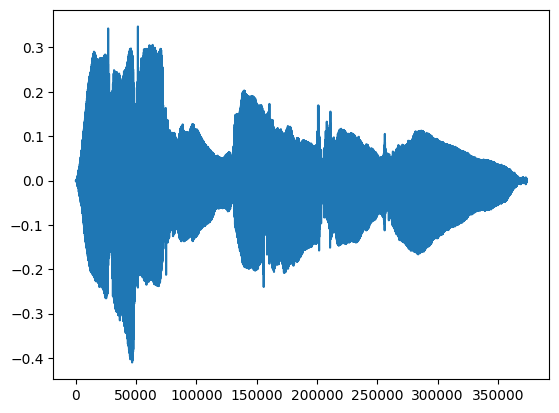

In [138]:
plt.plot(y1)

In [83]:
### fill the parameters
input_file = '../sounds/flute.wav'
window ='blackman'
M = 4401
N = 8192
t = -90
minSineDur = 0.1
nH = 500
minf0 = 300
maxf0 = 1500
f0et = 1
harmDevSlope = 0.02
stocf = 0.05

# No need to modify
Ns = 512
H = 128

(fs, x) = UF.wavread(input_file)
w = get_window(window, M, fftbins=True)
hfreq2, hmag2, hphase2, stocEnv2 = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)
y2, yh2, yst2 = HPS.hpsModelSynth(hfreq2, hmag2, hphase2, stocEnv2, Ns, H, fs)

ipd.display(ipd.Audio(data=x, rate=fs))
ipd.display(ipd.Audio(data=y2, rate=fs))

/Users/mhabana/dev/learning/upf/t1/audio_signal_processing/sms-tools/notebooks/../software/models/utilFunctions.py:60: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = read(filename)
/Users/mhabana/dev/learning/upf/t1/audio_signal_processing/sms-tools/notebooks/../software/models/stochasticModel.py:58: RuntimeWarning: divide by zero encountered in log10
  mX = 20 * np.log10(abs(X[:hN]))  # magnitude spectrum of positive frequencies


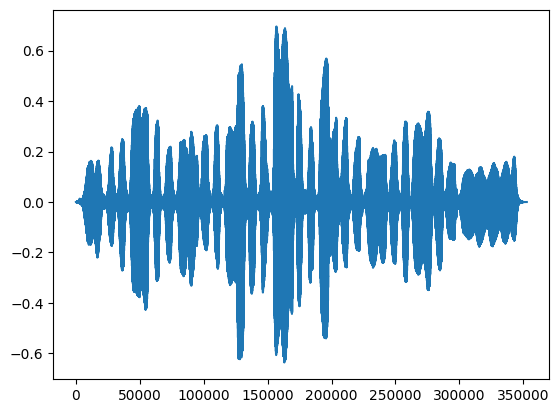

In [84]:
plt.plot(x)

In [136]:
# 1.2 Perform a transformation from the previous analysis


# hfreqIntp = np.array([0,0,0.5,0 ,0.51,0,0.919,0 ,0.92,0,1.37,0 ,1.371,0,2.62,1, 2.63,1,8,1 ])
hfreqIntp = np.array([0,0, 2.05,0, 2.9,0.5, 3.57, 1,8,1])
# hmagIntp = np.array([0,0,0.5,0 ,0.51,0,0.919,0 ,0.92,0,1.37,0 ,1.371,0,2.62,1, 2.63,1,8,0 ])
hmagIntp = np.array([0,0,2.05,0, 2.9,0.5, 3.57,1, 8,1])
stocIntp = np.array([0,0,2.05,0, 2.9,0.5, 3.57,1, 8,1])

yhfreq, yhmag, ystocEnv = HPST.hpsMorph(hfreq1=hfreq1, hmag1=hmag1, stocEnv1=stocEnv1, hfreq2=hfreq2, hmag2=hmag2, stocEnv2=stocEnv2, hfreqIntp=hfreqIntp, hmagIntp=hmagIntp, stocIntp=stocIntp)



# no need to modify anything after this
Ns = 512
H = 128

# synthesis from the trasformed hps representation 
y, yh, yst = HPS.hpsModelSynth(yhfreq, yhmag, np.array([]), ystocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=y, rate=fs))

### explain your transformations
"""
The transformation that I tried to perform is to start off with the cello phrase, then when the cello is on the fourth note which is sustained longer than the first three notes I wanted to slowly
morph the sound into the flute sound so that it will also start playing the descending portion of the scale towards the end of the sound.

I did this by using thee frequency magnitude and stocastic components of the cello phrase up until around 2.05 which is at the end of the 3rd note being played. Then to ease in the transition to the
flute sound I set the transformation to for all three components to 0.5 up to the end of the 4th sustained note. Then for the rest of the sound it will gradually morph into the flute sound.

"""

'\n\n\n'

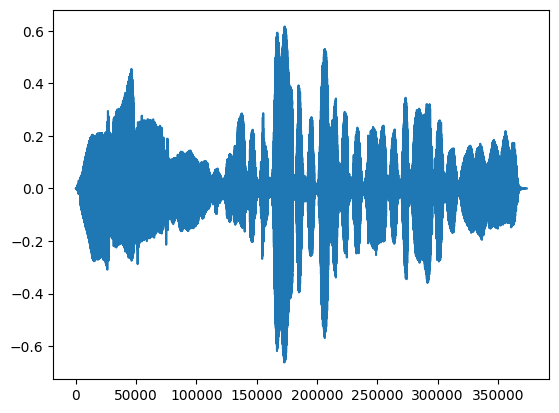

In [137]:
plt.plot(y)

In [10]:
print(len(stocEnv2[0,:]))

6
